In [5]:
import pathlib
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pathlib
import sys
sys.path.append("./../")
import random
from src.utils import load_data, prep_data
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Arial'

In [6]:
# Load data 
data = load_data([0,176])
sample_size = 3000 # TEST SIZE, if you want real plots s=3000

 <ipython-input-11-09eed95727ac>:13: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 <ipython-input-11-09eed95727ac>:14: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


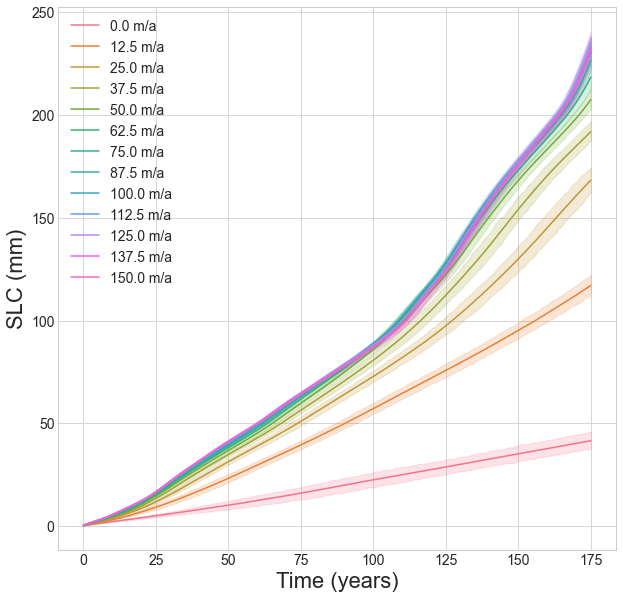

In [11]:
# Figure 2 
data_sub = data[data["resolution"] == 2]

# Array of your options
options = np.array([0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150])

# Function that finds the nearest value in options for given value
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Applying to your DataFrame
data_sub['melt_average'] = data_sub['melt_average'].apply(lambda x: find_nearest(options, x))
data_sub["Melt average"] = data_sub["melt_average"].astype(str) + " m/a"

plt.figure(figsize=(10,10))
sns.lineplot(data=data_sub,x="years",y="SLC",hue="Melt average")#
plt.xticks(np.arange(0, 176, 25),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time (years)",fontsize=22)
plt.ylabel("SLC (mm)",fontsize=22)
plt.legend(fontsize=14)
plt.savefig("./../assets/plots/fig_2/vary_melt.pdf",bbox_inches='tight')

 <ipython-input-12-b6c9582cc33d>:15: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


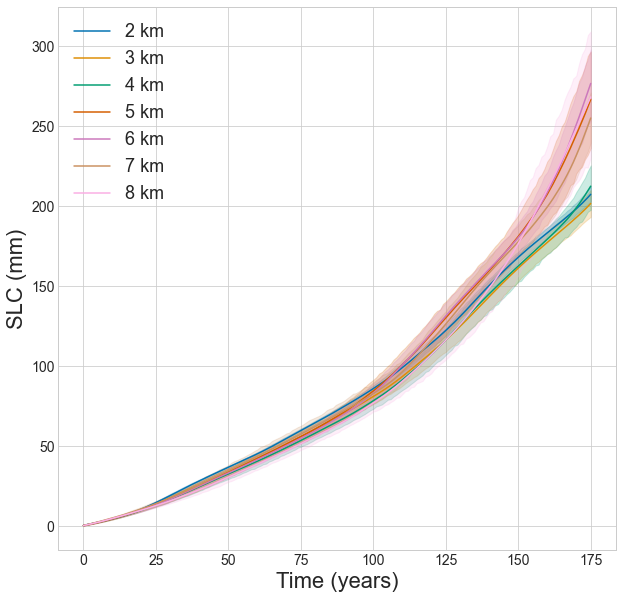

In [12]:
# Take a subset of data where melt_averege is around 49

# Array of your options
options = np.array([0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150])

# Function that finds the nearest value in options for given value
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Applying to your DataFrame
data_sub = data
data_sub['melt_average'] = data['melt_average'].apply(lambda x: find_nearest(options, x))
data_sub = data_sub[data_sub["melt_average"] == 50]
data_sub["Resolution"] = data_sub["resolution"].astype(str) + " km"


plt.figure(figsize=(10,10))
sns.lineplot(data=data_sub,x="years",y="SLC",hue="Resolution")#
plt.xticks(np.arange(0, 176, 25),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time (years)",fontsize=22)
plt.ylabel("SLC (mm)",fontsize=22)
plt.legend(fontsize=18)
plt.savefig("./../assets/plots/fig_2/vary_res.pdf",bbox_inches='tight')